In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
'''
Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features.
Drop other two features for simplicity.
Figure out if any preprocessing such as scaling would help here
Draw elbow plot and from that figure out optimal value of k
'''

'\nUse iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features.\nDrop other two features for simplicity.\nFigure out if any preprocessing such as scaling would help here\nDraw elbow plot and from that figure out optimal value of k\n'

In [5]:
from sklearn.datasets import load_iris
df=load_iris()

In [7]:
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
data=pd.DataFrame(df.data,columns=df.feature_names)

In [11]:
columns=data[['petal length (cm)'	,'petal width (cm)']]
data=columns
data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'width')

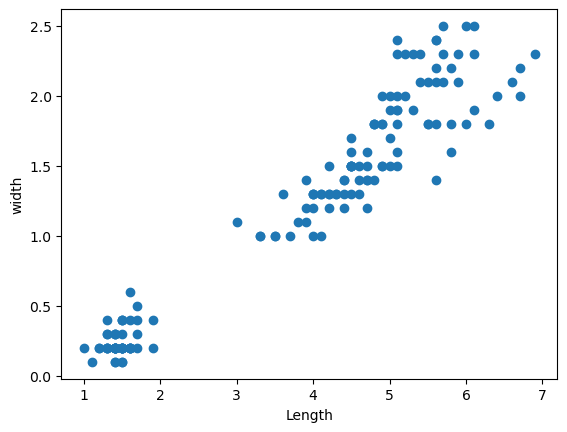

In [13]:
plt.scatter(data['petal length (cm)'],data['petal width (cm)'])
plt.xlabel('Length')
plt.ylabel('width')

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 

In [29]:
x=data[['petal length (cm)','petal width (cm)']]
scaler=MinMaxScaler()
x_scaler=scaler.fit_transform(x)
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(x_scaler)
y_predicted

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
data["Cluster"]=y_predicted

In [33]:
# Elbow Plot
data.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [ ]:
# plot the clusters using an elobow plot 
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x_scaler)
    sse.append(km.inertia_)

In [39]:
dft=km.inertia_
dft

0.4384503668376229

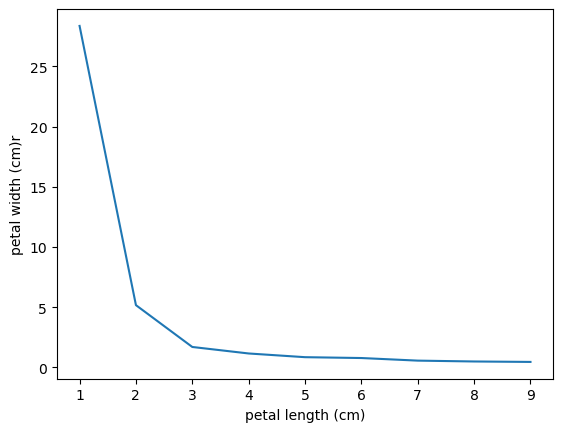

In [48]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)r')
plt.plot(k_rng,sse)

In [50]:
dc=km.cluster_centers_
dc

array([[0.65725047, 0.68981481],
       [0.07830508, 0.06083333],
       [0.78412132, 0.91447368],
       [0.53880464, 0.49122807],
       [0.69868173, 0.77777778],
       [0.44237288, 0.3875    ],
       [0.95932203, 0.84166667],
       [0.62389023, 0.5734127 ],
       [0.81779661, 0.703125  ]])

In [52]:
data

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1
